# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

# Load The Dataset

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Dataset Information & Cleaning

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    str    
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    str    
 6   Selling_type   301 non-null    str    
 7   Transmission   301 non-null    str    
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), str(4)
memory usage: 21.3 KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df['Car_Age'] = 2024 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

1. Selling Price Distribution

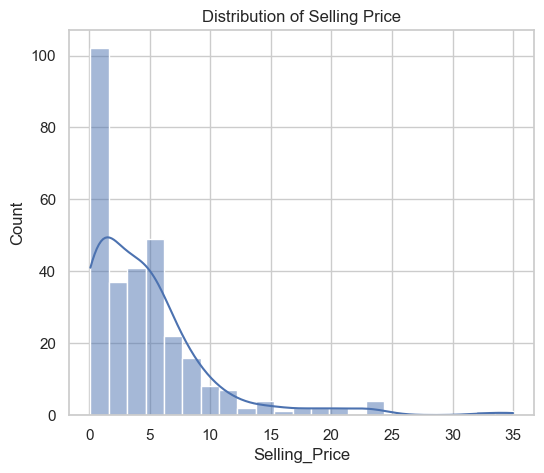

In [6]:
plt.figure(figsize=(6,5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.show()

2. Fuel Type vs Selling Price

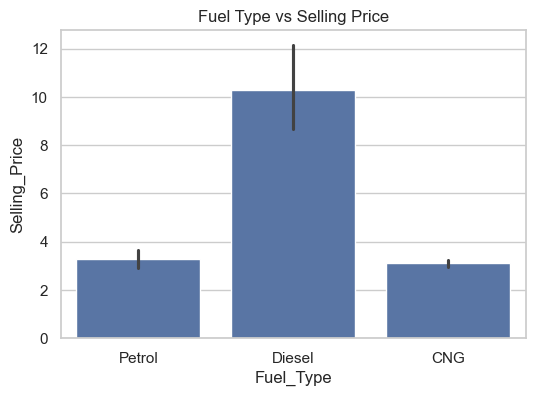

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()

3. Transmission vs Selling Price

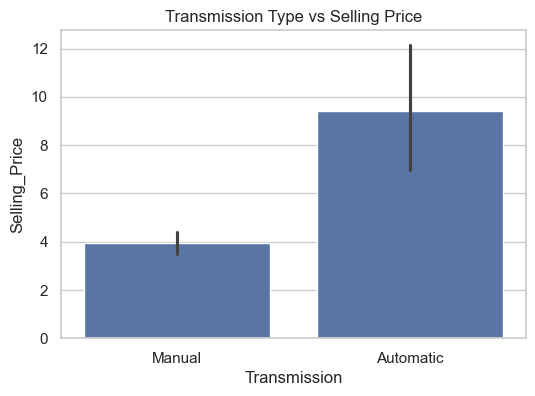

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Transmission Type vs Selling Price")
plt.show()

4. Kms Driven vs Selling Price

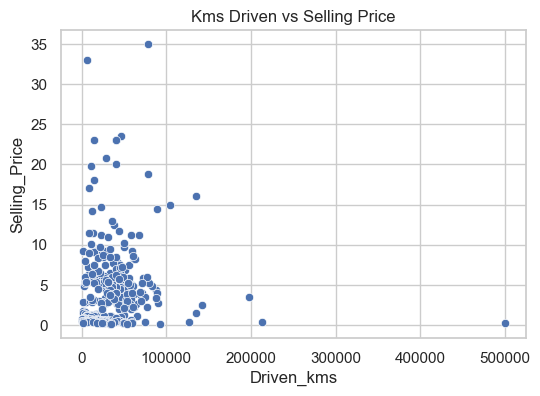

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title("Kms Driven vs Selling Price")
plt.show()

5. Car Age vs Selling Price

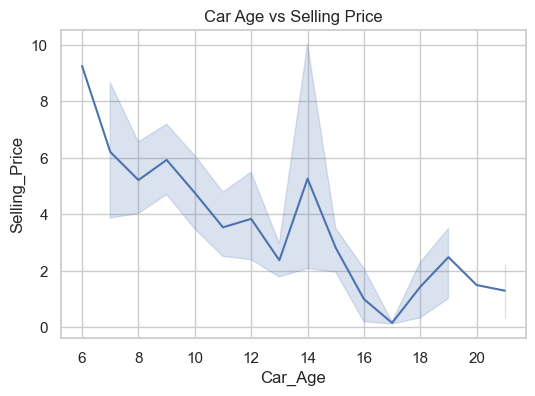

In [10]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Car Age vs Selling Price")
plt.show()

6. Correlation Heatmap

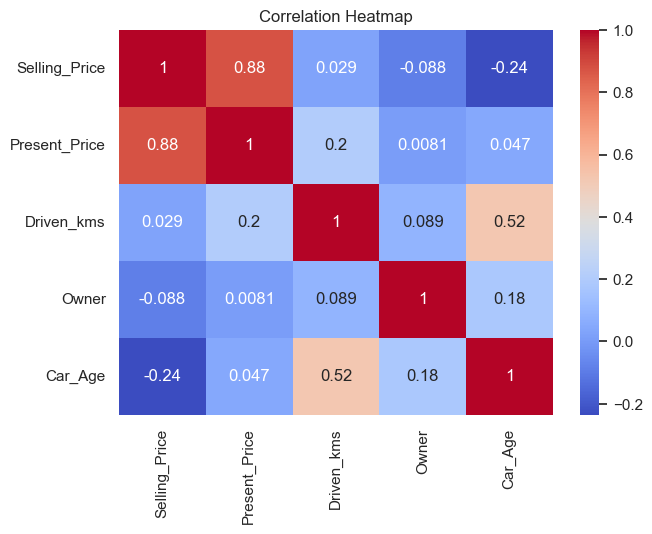

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Encoding Categorical Variables

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


# Feature Selection & Train-Test Split

In [13]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training


1. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R²: {r2_lr:.4f} ({r2_lr*100:.2f}%)")

Linear Regression R²: 0.8312 (83.12%)


2. Random Forest Regressor

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2:.4f} ({r2*100:.2f}%)")

Random Forest R²: 0.7521 (75.21%)


# Model Evaluation Metrics
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score

In [16]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation (Prices in ₹ Lakhs):")
    print(f"MAE  : ₹ {mae:.1f} Lakhs")
    print(f"MSE  : {mse:.2f} Lakhs")
    print(f"RMSE : ₹ {rmse:.2f} Lakhs")
    print(f"R²   : {r2:.3f} ({r2*100:.2f}%)")

print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)

Random Forest Evaluation:
Model Evaluation (Prices in ₹ Lakhs):
MAE  : ₹ 1.0 Lakhs
MSE  : 9.31 Lakhs
RMSE : ₹ 3.05 Lakhs
R²   : 0.752 (75.21%)


# Prediction on New Car Data

In [17]:
sample_df = X_test.iloc[[0]]   # keeps column names
predicted_price = rf.predict(sample_df)

print(f"Predicted Car Price: ₹ {predicted_price[0]:.2f} Lakhs")

Predicted Car Price: ₹ 0.17 Lakhs


# Visualization of Model Predictions
- Actual vs Predicted Prices
- Prediction Error Distribution
- Actual vs Predicted (First 20 Samples)
- Feature Importance Visualization

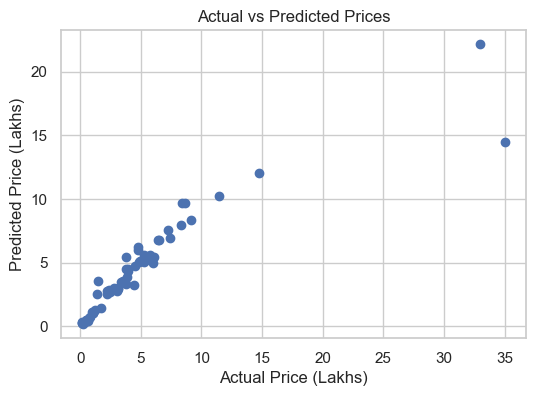

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted Prices")
plt.show()

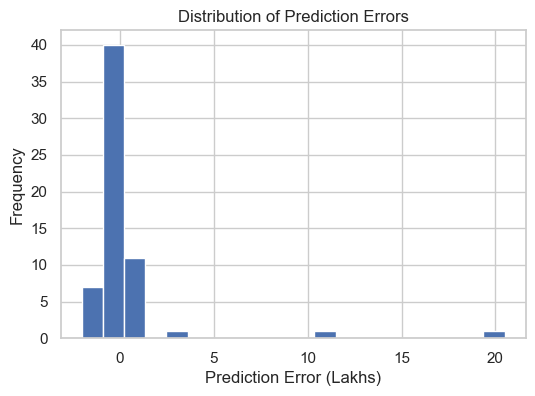

In [19]:
errors = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.hist(errors, bins=20)
plt.xlabel("Prediction Error (Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

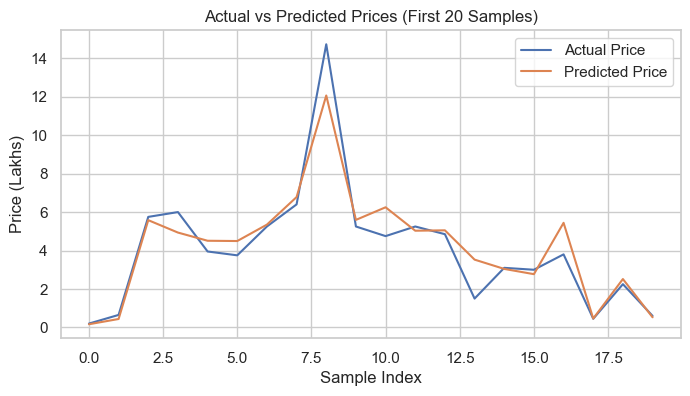

In [20]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values[:20], label="Actual Price")
plt.plot(y_pred_rf[:20], label="Predicted Price")
plt.xlabel("Sample Index")
plt.ylabel("Price (Lakhs)")
plt.title("Actual vs Predicted Prices (First 20 Samples)")
plt.legend()
plt.show()

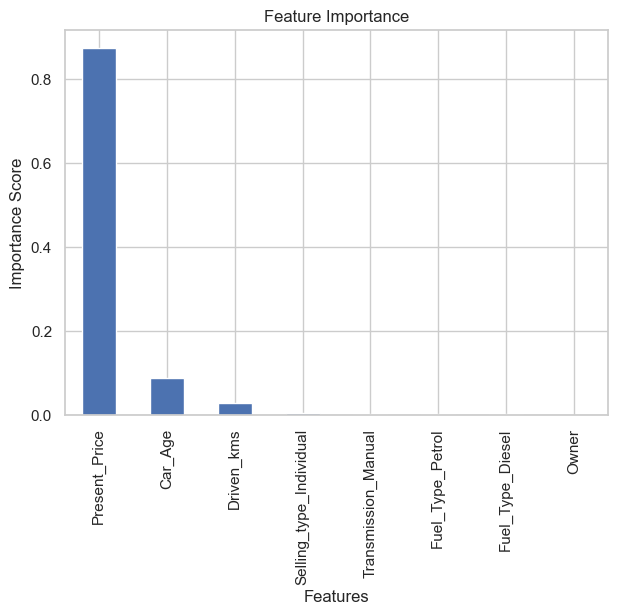

In [21]:
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(7,5))
feature_importance.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()